# Simple Linear Regression from Scratch

## $Y = m *X + b $

## $ m = \frac{\sum_{i=1}^{n} (X_i - X_{\text{mean}})(Y_i - Y_{\text{mean}})}{\sum_{i=1}^{n} (X_i - X_{\text{mean}})^2} $

## $ b = Y_{\text{mean}} - m * X_{\text{mean}}  $

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [3]:
class LR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self , X_train , Y_train):
        
        X_mean = X_train.mean()
        Y_mean = Y_train.mean()
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num +  (X_train.iloc[i] - X_mean) * (Y_train.iloc[i] - Y_mean)
            den = den + ( (X_train.iloc[i] - X_mean) ** 2 )
            
        self.coef_ = num / den
        self.intercept_ = Y_mean - (self.coef_ * X_mean)

    def predict(self , X_test):

        return ( (self.coef_ * X_test) + self.intercept_)
            

In [ ]:
df = pd.read_csv('data/simple_lr_placement.csv')

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [7]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [8]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((160,), (40,), (160,), (40,))

In [9]:
obj = LR()

obj.fit(X_train , Y_train)

In [10]:
obj.predict(np.array([7.9]))

array([3.5096192])

In [11]:
y_pred = obj.predict(X_test)
print(obj.intercept_ , obj.coef_)

-1.0270069374542108 0.5742564727019197


In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [13]:
mae = mean_absolute_error(Y_test , y_pred)
mse = mean_squared_error(Y_test , y_pred)
rmse = np.sqrt( mean_squared_error(Y_test , y_pred) )
r2 = r2_score(Y_test , y_pred)
adj_r2 = 1 - ( ( ( 1- r2) * (X_test.shape[0]) ) / ( X_test.shape[0] - 1 - 1) )

In [14]:
print('For LR class --- ')
print(f' Mean Absolute Error : {mae}')
print(f' Mean Squared Error : {mse}')
print(f' Root Mean Squared Error : {rmse}')
print(f' R2 Socre : {r2}')
print(f' Adjusted R2 Score : {adj_r2}')

For LR class --- 
 Mean Absolute Error : 0.23150985393278373
 Mean Squared Error : 0.08417638361329656
 Root Mean Squared Error : 0.2901316659954521
 R2 Socre : 0.7730984312051673
 Adjusted R2 Score : 0.7611562433738603


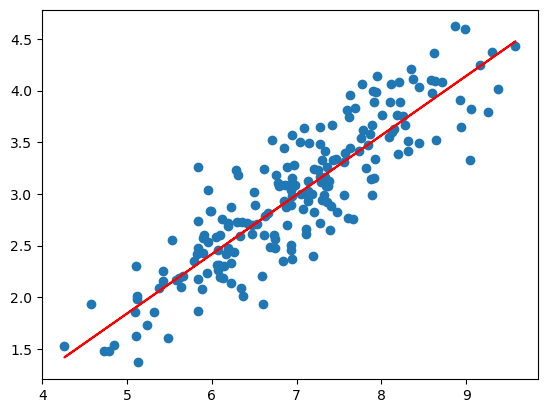

In [15]:
plt.scatter(X , Y)
plt.plot(X , obj.predict(X) , color = 'red')

### Now with SKLearn Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(X_train.shape[0] , 1) , Y_train)
print(lr.intercept_ , lr.coef_)
y_pred_lr = lr.predict(X_test.values.reshape(X_test.shape[0] , 1))

-1.02700693745421 [0.57425647]


In [17]:
mae = mean_absolute_error(Y_test , y_pred_lr)
mse = mean_squared_error(Y_test , y_pred_lr)
rmse = np.sqrt( mean_squared_error(Y_test , y_pred_lr) )
r2 = r2_score(Y_test , y_pred_lr)
adj_r2 = 1 - ( ( ( 1- r2) * (X_test.shape[0]) ) / ( X_test.shape[0] - 1 - 1) )

In [18]:
print('For SKLearn LinearRegression ----- ')
print(f' Mean Absolute Error : {mae}')
print(f' Mean Squared Error : {mse}')
print(f' Root Mean Squared Error : {rmse}')
print(f' R2 Socre : {r2}')
print(f' Adjusted R2 Score : {adj_r2}')

For SKLearn LinearRegression ----- 
 Mean Absolute Error : 0.23150985393278373
 Mean Squared Error : 0.08417638361329657
 Root Mean Squared Error : 0.2901316659954521
 R2 Socre : 0.7730984312051673
 Adjusted R2 Score : 0.7611562433738603
